In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Load data
df = pd.read_excel('glass.xlsx', sheet_name='glass')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
# EDA: Check for missing values and outliers
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

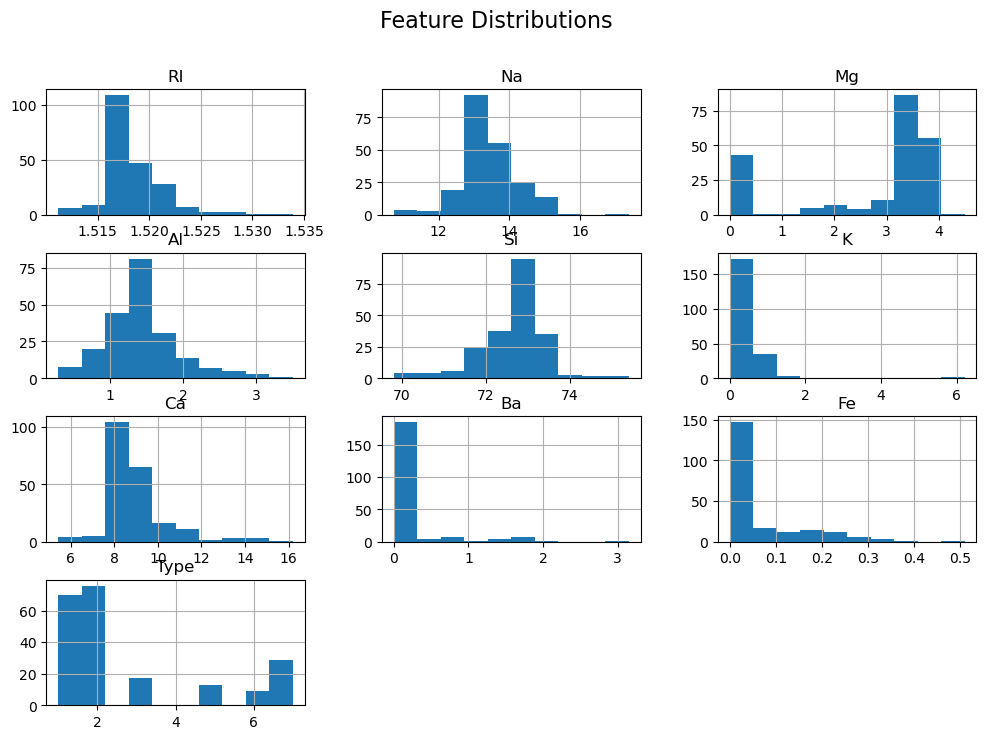

In [6]:
# Visualizations (histograms, boxplots, heatmap omitted in this paragraph)
# Histograms
df.hist(figsize=(12, 8))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

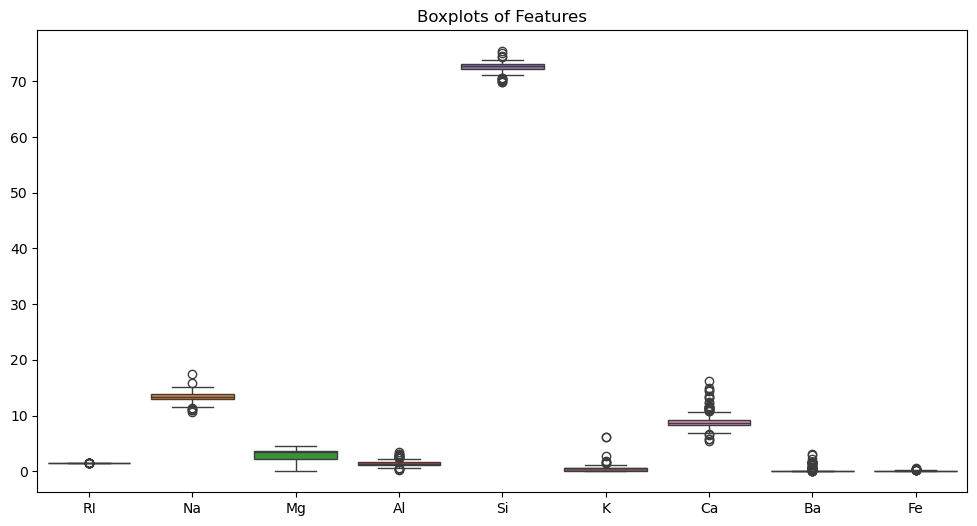

In [7]:
# Boxplots for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop('Type', axis=1))
plt.title("Boxplots of Features")
plt.show()

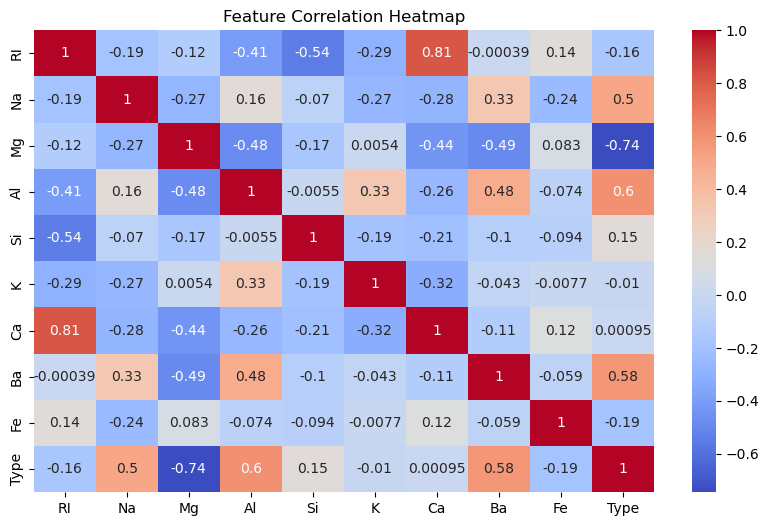

In [8]:
# Heatmap for correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
# Data preprocessing: no missing, no categorical, scale features
X = df.drop('Type', axis=1)
y = df['Type']
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Train/test split, stratified
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Random Forest with class_weights to address imbalance
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest Report:', classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Report:               precision    recall  f1-score   support

           1       0.69      0.79      0.73        14
           2       0.77      0.67      0.71        15
           3       0.50      0.33      0.40         3
           5       0.75      1.00      0.86         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.74        43
   macro avg       0.73      0.77      0.74        43
weighted avg       0.75      0.74      0.74        43

Accuracy: 0.7441860465116279


In [12]:
# Bagging (Random Forest) vs Boosting (AdaBoost)
import warnings
warnings.filterwarnings('ignore')
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print('AdaBoost Report:', classification_report(y_test, y_pred_ada))

AdaBoost Report:               precision    recall  f1-score   support

           1       0.54      0.93      0.68        14
           2       0.42      0.33      0.37        15
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.50      1.00      0.67         2
           7       1.00      0.50      0.67         6

    accuracy                           0.53        43
   macro avg       0.41      0.46      0.40        43
weighted avg       0.48      0.53      0.48        43



In [13]:
####Explanations####
##1. Explain Bagging and Boosting methods. How is it different from each other.
#A. Bagging (Bootstrap Aggregation): Multiple models (usually decision trees) are trained independently on random subsets of the data. The results are then combined by averaging (for regression)
#or majority vote (for classification). Example: Random Forest.
#B. Boosting: Models are trained sequentially. Each new model focuses on the errors made by the previous models, giving more weight to difficult-to-classify samples. Example: AdaBoost.
#C. Key Difference: Bagging reduces variance by averaging independent learners, while Boosting reduces bias by focusing on mistakes of previous learners.

In [14]:
###Explain how to handle imbalance in the data.
##Method 1: Use class weights (e.g., class_weight='balanced' in Random Forest).
##Method 2: Oversampling minority classes (e.g., SMOTE).
##Method 3: Undersampling majority classes.
##Method 4: Ensemble methods that can adapt to imbalance (e.g., BalancedRandomForest, EasyEnsemble).

In [15]:
#############Conclusion:#############
#Random Forest (Bagging) vs AdaBoost (Boosting) results are shown above.
#Compare Precision, Recall, and F1-score: Whichever model gives higher scores is more reliable for glass classification.
#If Random Forest shows higher recall: it captures more classes correctly, good for imbalanced data.
#If AdaBoost performs better in precision: it makes fewer false predictions.
#Overall recommendation: Choose the model that balances precision & recall for majority and minority classes.